Can't figure out how to get inheritance to work so its coded in the main right now.

0m 0s (0 0%) 0.0010
0m 2s (10000 3%) 0.0143
0m 5s (20000 6%) 0.0053
0m 8s (30000 9%) 0.0002
0m 11s (40000 13%) 0.0005
0m 14s (50000 16%) 0.0028
0m 16s (60000 19%) 0.0025
0m 19s (70000 22%) 0.0059
0m 22s (80000 26%) 0.0018
0m 25s (90000 29%) 0.0000
0m 28s (100000 32%) 0.0002
0m 30s (110000 35%) 0.0026
0m 33s (120000 39%) 0.0000
0m 36s (130000 42%) 0.0011
0m 39s (140000 45%) 0.0024
0m 42s (150000 48%) 0.0001
0m 44s (160000 52%) 0.0000
0m 47s (170000 55%) 0.0030
0m 50s (180000 58%) 0.0000
0m 53s (190000 61%) 0.0232
0m 56s (200000 65%) 0.0018
0m 59s (210000 68%) 0.0000
1m 1s (220000 71%) 0.0035
1m 4s (230000 74%) 0.0022
1m 7s (240000 78%) 0.0007
1m 10s (250000 81%) 0.0000
1m 13s (260000 84%) 0.0000
1m 15s (270000 88%) 0.0006
1m 18s (280000 91%) 0.0001
1m 21s (290000 94%) 0.0003
1m 24s (300000 97%) 0.0002


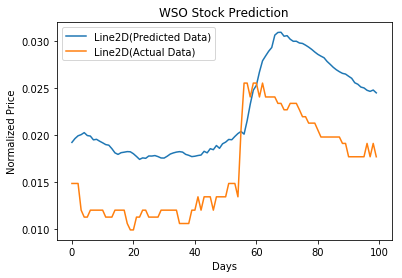

In [27]:
import quandl
import matplotlib.pyplot as plt
import torch.optim as optim
from prediction_model import prediction_model as PredictionModel

"""
Class to perform stochastic gradient descent. Inherits from prediction_model.

"""

class StochasticGradientDescent(PredictionModel):
    """
    Constructor
    """
    def __init__(self, input_size=10, hidden_size=128, output_size=1, 
                 learning_rate=0.0001, epochs=1, log_name='runs/runs'):
        PredictionModel.__init__(self, input_size, hidden_size, output_size, learning_rate, epochs, log_name)
        self.optimizer = optim.SGD(self.rnn.parameters(), learning_rate)

if __name__ == '__main__':
    model = PredictionModel()
    quandl.ApiConfig.api_key = '4Tseyq-3se2tUfZsYZe2'
    model.optimizer = optim.SGD(model.rnn.parameters(), 0.0001)
    model.train_data()
    data=model.data.get_data('Wiki', {'Stock':'WSO'})
    acc, y_res, y_test=model.test_stock(data)
    pred_plot,=plt.plot(y_res.data.numpy()[100:200], label='Predicted Data')
    act_plot,=plt.plot(y_test[100:200], label='Actual Data')
    plt.xlabel('Days')
    plt.ylabel('Normalized Price')
    plt.title('WSO Stock Prediction')
    plt.legend([pred_plot, act_plot])